# Supervised learning using Logistic Regression

Using a binary classification dataset, two outputs (1 for positive and 0 for negative). 

Using logistic regression

1. Logistic Function overview
2. Other relevant math resources
3. Dataset Analysis
4. Data Visualization
5. Data Preparation
6. Multicollinearity Consideration
7. Scikit Learn: Logistic Reg
8. Testing and Training Datasets
9. Conclusion

[Statsmodels](http://statsmodels.sourceforge.net/).

In [6]:
#Importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#importing math
import math

#Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#Machine Learning import
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

#Evaluating ML metric
from sklearn import metrics

#Dataset import 
import statsmodels.api as sm

# 1. Logistic Function overview
i/p of logistic function (-inf,inf).
o/p of logistic function (0,1)
The logistic function:
$$ \sigma (t)= \frac{1}{1+e^{-t}}$$


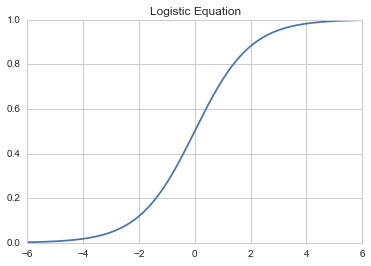

In [4]:
def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))
t=np.linspace(-6,6,500) #500 linearly spacec values between -5 to 5
y=np.array([logistic(ele) for ele in t])

#Plot
plt.plot(t,y)
plt.title('Logistic Equation')

If we remember back to the Linear Regression Lectures, we could describe a [Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) Function model as:
$$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$

Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form:
$$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$

For our logistic function, if we view *t* as a linear function with a variable *x* we could express t as:
$$ t = \beta _0 + \beta _1 x $$

Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as:
$$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

# 2. other relevant resources
1.) [Andrew Ng's class notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) on Logistic Regression (Note: Scroll down) 

2.) [CMU notes](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) Note: Advanced math notation.

3.) [Wikipedia](http://en.wikipedia.org/wiki/Logistic_regression) has a very extensive look at logistic regression.`

# 3. Dataset Analysis

useful link or data : [dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html)

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs
    
    #### source
    Fair, Ray. 1978. “A Theory of Extramarital Affairs,” `Journal of Political
Economy`, February, 45-61.
The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm


# 4. Data Visualization



In [43]:
#loading statsmodels datasets into pandas datagrame
#fair is the name of the affair dataset in statsmodels

#Standard method (statsmodels->pandas dataframe)
df=sm.datasets.fair.load_pandas().data

df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [44]:
#Creating a new column called "Had affair". if "affairs column is 0"
#then "Had affair" is 0. if "affairs column is not 0" then "Had affair" is 1.

#create check function

def affair_check(x):
    if x!=0:
        return 1
    return 0

#Apply to the dataframe
df['Had Affair'] = df['affairs'].apply(affair_check)

In [45]:
df['Had Affair'].value_counts()

0    4313
1    2053
Name: Had Affair, dtype: int64

In [46]:
#grouping by Had affair column
df.groupby('Had Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [47]:
#CONCLUSION: women who had affairs were slightly older, married longer, 
#slightly less religious and less educated" 

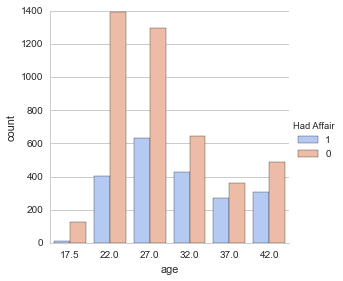

In [48]:
#factorplot for age with had affair hue
sns.factorplot('age',data=df,hue='Had Affair',palette='coolwarm',kind='count',
              order=sorted(df['age'].unique()))
#conclusion
#higher probability of affair as age increases

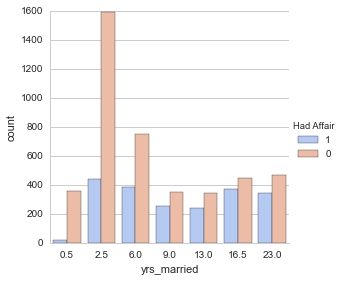

In [50]:
#factorplot for years married with had affair hue
sns.factorplot('yrs_married',data=df,hue='Had Affair',palette='coolwarm',kind='count',
              order=sorted(df['yrs_married'].unique()))
#conclusion
#higher probability of affair as yrs_married increases

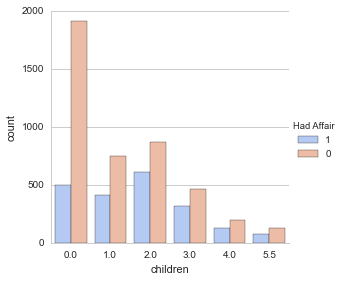

In [51]:
#factorplot for children with had affair hue
sns.factorplot('children',data=df,hue='Had Affair',palette='coolwarm',kind='count',
              order=sorted(df['children'].unique()))
#conclusion
#higher probability of affair as children are less 

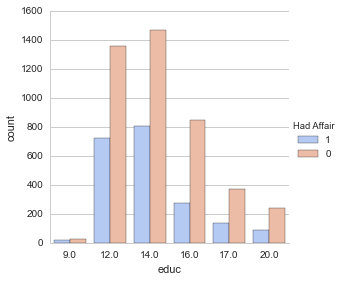

In [53]:
#factorplot for children with had affair hue
sns.factorplot('educ',data=df,hue='Had Affair',palette='coolwarm',kind='count',
              order=sorted(df['educ'].unique()))
#conclusion
#harder to make any conclusion

# 5.Data Preparation
Two columns Occupation and husband occupation that are integer values/ categorical variables

useful link for dummies [here](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29)

In [55]:
#creating dummy variables for these two columns

#if we leave it as the values 1,2,3,4,5,6, then regression model will think of it
# as a continuous model that can take 1.2,3.4 etc. which is not the case.
#Hence we create dummy variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

#occ_dummies.head()

In [56]:
#creating readable columns for these data frames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [60]:
#Setting X as new Dataframe without the occupation columns or the Y target
X=df.drop(['occupation','occupation_husb','Had Affair'],axis=1)

In [63]:
#concatenating the dummy dataframe together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

#concatenating the X dataframe and dummies dataframe
X = pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,...,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [69]:
#Seeting up target Y
Y = df['Had Affair']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had Affair, dtype: int64

# 6. Multicollinearity Consideration
### IMPORTANT: dummy variables are highly correlated. 
### If we know one dummy variable is 1, then we know for a fact that the rest are 0.

#if we drop/sacrific one column, we can avoid multicollinearity

useful multicollinearity [here](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity)

In [73]:
#dropping occ1, hocc1, affairs column
X=X.drop(['occ1','hocc1','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,...,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [77]:
type(Y)

pandas.core.series.Series

In [78]:
#Flattening target array Y
Y=np.ravel(Y)
type(Y)

numpy.ndarray

# 7. Scikit Learn: Logistic Regression

In [79]:
#create a class logreg
logreg = LogisticRegression()
logreg.fit(X,Y) #fitting data
logreg.score(X,Y) #testing accuracy

0.72588752748978946

In [80]:
#checking with original Y data
Y.mean() #indicates the percentage of woman who had affairs

0.32249450204209867

In [81]:
#32% had affair, 68% had no affair. Guessing "no affair"
#would have had 68% success. DOing better than 68% at 72% but not that great

In [82]:
#using zip to consolidate column names and np.transpose to gather 
#coefficents from model
coeff_df = DataFrame(zip(X.columns, np.transpose(logreg.coef_)))

In [83]:
coeff_df

,0,1
0,rate_marriage,[-0.698728880366]
1,age,[-0.0568617237777]
2,yrs_married,[0.104227579974]
3,children,[0.0180796163302]
4,religious,[-0.369344062785]
5,educ,[0.00804165559241]
6,occ2,[0.247618554618]
7,occ3,[0.402894192353]
8,occ4,[0.273080166924]
9,occ5,[0.571996441349]


#conclusion: positive coeff => increasing likelihood of affair
#negative coeff => decreasing likelihood of affair
#increased marriage rating => lower likelihood of affair
#increased religiousness => lowe likelihood of affair
#Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).

# 8. Training and testing data

In [85]:
#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#make new log reg model
logreg2 = LogisticRegression()
logreg2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
#Predicting the classes of testing data set
class_predict = logreg.predict(X_test)

#Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.726130653266


# 9. Conclusion
To further improve our Logistic Regression model? We could try some [regularization techniques](http://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning) or using a non-linear model.

1.) Great post for logistic regression analysis using Statsmodels from [yhat](http://blog.yhathq.com/posts/logistic-regression-and-python.html)!

2.) SciKit learn Documentation several [examples](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (at the bottom of the page.)

3.) DataRobot overview of [Logistic Regression](http://www.datarobot.com/blog/classification-with-scikit-learn/)

4.) Another resource [aimotion.blogspot](http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html) 
on the Logistic Regression and the Mathmatics of how it relates to the cost function and gradient!